# 一、元组
元组有以下特点：
1. 有序：可以通过索引取出来元素
2. 不可变，不可修改
3. 可迭代、可切片
所以元组适合存储不应被程序意外修改的数据（例如配置常量、数据库记录的字段等）。函数返回多个值时，默认就是以元组的形式返回的。由于元组是不可变的，它可以作为字典的键（List 不可以）。

元组和字符串性质一样，那为什么需要2个数据结构来表达这两个类型呢？是因为它们之间的根本区别在于它们内部存储的元素类型

- 元组可以存储任意不同类型的数据对象（异构）。例如：整数、浮点数、列表、函数等。----异构容器，类似于表格存储
- 字符串只能存储字符（本质上是文本数据，都是字符类型）。---同构序列，文件名存储

不可变意味着他不具备增删改的步骤，增加就是创建新元组了

In [96]:
from lightgbm import LGBMClassifier
from sympy.stats.sampling.sample_numpy import numpy
from xgboost import XGBClassifier

# 创建元组
# 原始元组：(姓名, 年龄, 成绩)
old_tuple=("张三",25,92.5)

print(old_tuple)
print(type(old_tuple))

('张三', 25, 92.5)
<class 'tuple'>


接下来看看如何修改元组

In [97]:
temp_list=list(old_tuple) # 转换为list

print(temp_list)
print(type(temp_list))

temp_list[1]=26

print(f'修改后的temp_list：{temp_list}')

new_tuple=tuple(temp_list) # 转换回元组

print('新元组：')
print(new_tuple)
print(type(new_tuple))

['张三', 25, 92.5]
<class 'list'>
修改后的temp_list：['张三', 26, 92.5]
新元组：
('张三', 26, 92.5)
<class 'tuple'>


---

# 二、字典的items方法
`.items()`方法可以返回字典的键值对

In [98]:
pbounds = {
    'n_estimators': (10, 3000), 
    'max_depth': (3, 500), 
    'max_features': (0.1, 1.0)
}

for param, (low, high) in pbounds.items():
   print(f"参数: {param} , 搜索范围: [{low}, {high}]")

参数: n_estimators , 搜索范围: [10, 3000]
参数: max_depth , 搜索范围: [3, 500]
参数: max_features , 搜索范围: [0.1, 1.0]


这和前几天学的enumerate方法非常像，他可以遍历任何可迭代对象，返回索引+元素

In [99]:
print('=======1. 遍历列表=======')
my_list = ['苹果', '香蕉', '樱桃', '日期']
for index,item in enumerate(my_list):
    print(f'索引：{index}, 元素：{item}')

=======1. 遍历列表=======
索引：0, 元素：苹果
索引：1, 元素：香蕉
索引：2, 元素：樱桃
索引：3, 元素：日期


In [100]:
print('=======2. 遍历字符串=======')
my_string = "Python"
for index,item in enumerate(my_string):
    print(f'索引：{index}, 元素：{item}')

=======2. 遍历字符串=======
索引：0, 元素：P
索引：1, 元素：y
索引：2, 元素：t
索引：3, 元素：h
索引：4, 元素：o
索引：5, 元素：n


In [101]:
print('=======3. 遍历元组=======')
my_tuple = ('张三', '李四', '王五')
for index,item in enumerate(my_tuple):
    print(f'索引：{index}, 元素：{item}')

=======3. 遍历元组=======
索引：0, 元素：张三
索引：1, 元素：李四
索引：2, 元素：王五


In [102]:
print('=======4. 遍历字典的键=======')
my_dict_simple = {'A': 10, 'B': 20, 'C': 30}
for index, key in enumerate(my_dict_simple):
    print(f"索引: {index}, 键: {key}, 对应值: {my_dict_simple[key]}")

=======4. 遍历字典的键=======
索引: 0, 键: A, 对应值: 10
索引: 1, 键: B, 对应值: 20
索引: 2, 键: C, 对应值: 30


`items`和`enumerate`联合

In [103]:
my_dict_simple = {'A': 10, 'B': 20, 'C': 30}

# 1. my_dict_simple.items() 返回 ('A', 10), ('B', 20) 等 (键, 值) 元组
# 2. enumerate 为这些元组添加索引
# 3. 循环中用 index, (key, value) 进行两次解包
for index, (key, value) in enumerate(my_dict_simple.items()):
    # 键和值通过解包直接获得，无需额外查表
    print(f"索引: {index}, 键: {key}, 对应值: {value}")

索引: 0, 键: A, 对应值: 10
索引: 1, 键: B, 对应值: 20
索引: 2, 键: C, 对应值: 30


---

# 三、贝叶斯优化可视化
## 1. 数据预处理（同Day 11）

In [104]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [105]:
data=pd.read_csv('data.csv')
data.head()

discrete_features = data.select_dtypes(include=['object']).columns.tolist()
# Home Ownership 标签编码
maps={
    'Home Ownership' : {
    'Own Home': 1,
    'Rent': 2,
    'Have Mortgage': 3,
    'Home Mortgage': 4
    },
    'Years in current job':{
    '< 1 year': 1,
    '1 year': 2,
    '2 years': 3,
    '3 years': 4,
    '4 years': 5,
    '5 years': 6,
    '6 years': 7,
    '7 years': 8,
    '8 years': 9,
    '9 years': 10,
    '10+ years': 11
},
    'Term':{
    'Short Term': 0,
    'Long Term': 1
} 
}

data=data.replace(maps)

# Purpose 独热编码，记得需要将bool类型转换为数值
data=pd.get_dummies(data,columns=['Purpose'])
data2=pd.read_csv('data.csv')
list_diff=data.columns.difference(data2.columns)
data[list_diff]=data[list_diff].astype(int)

data.rename(columns={'Term': 'Long Term'}, inplace=True) # 重命名列
continuous_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()  #把筛选出来的列名转换成列表
 
 # 连续特征用中位数补全
for feature in continuous_features:     
    mode_value = data[feature].mode()[0]            #获取该列的众数。
    data[feature].fillna(mode_value, inplace=True)          #用众数填充该列的缺失值，inplace=True表示直接在原数据上修改。

data.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,...,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding
0,0,1,482087.0,11.0,0.0,11.0,26.3,685960.0,1.0,14.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1025487.0,11.0,0.0,15.0,15.3,1181730.0,0.0,14.0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,751412.0,9.0,0.0,11.0,35.0,1182434.0,0.0,14.0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,805068.0,7.0,0.0,8.0,22.5,147400.0,1.0,14.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,776264.0,9.0,0.0,13.0,13.6,385836.0,1.0,14.0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split

X = data.drop(['Credit Default'], axis=1)
y = data['Credit Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")
print(f"类别分布:\n{y_train.value_counts()}")

训练集大小: (6000, 31)
测试集大小: (1500, 31)
类别分布:
Credit Default
0    4328
1    1672
Name: count, dtype: int64


## 2. 基础贝叶斯优化
这里用XGBoost模型为例
XGBoost的核心思想是“集成学习”中的“Boosting”策略。例如，我们要预测一位顾客是否会购买某件商品。单独一个模型的预测可能不够准确，于是我们组建一个由多个“决策树”模型组成的团队来共同决策。
这个团队的工作方式很特别，不是大家同时独立工作，而是有顺序地、一个接一个地进行：
1. 第一个“学生”（决策树）先尝试预测：它会根据已有的数据（比如顾客的年龄、购物历史等）给出一个初步的预测结果。这个预测很可能不完美，会与真实结果存在一些误差。
2. 第二个“学生”专注学习前一个的错误：第二个模型的主要任务不是从头开始预测，而是学习第一个模型预测结果中的“残差”（即预测值与真实值之间的差距）。它的目标是弥补第一个模型的不足之处。
3. 后续“学生”不断迭代：接下来的每一个新模型，都会在前一个模型的基础上，继续学习之前所有模型加起来的预测结果与真实情况的差距。这样，每一位新加入的“团队成员”都在为修正整个团队的错误而努力。
4. 最终决策：集体智慧的结晶：当所有“学生”都训练完毕后，最终的预测结果就是把每一个“学生”的预测结果加权汇总。这样一来，通过不断减少残差，整个团队的预测能力就变得非常强大和精准。

In [107]:
from bayes_opt import BayesianOptimization
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import time

# 定义目标函数
def rf_eval(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    """
    目标函数：评估随机森林在给定参数下的性能
    BayesianOptimization 会最大化这个函数的返回值
    
    参数说明：
    - n_estimators: 树的数量（越多越好，但会增加计算时间）
    - max_depth: 树的最大深度（太浅欠拟合，太深过拟合）
    - min_samples_split: 分裂所需最小样本数（控制树的生长）
    - min_samples_leaf: 叶节点最小样本数（防止过拟合）
    - max_features: 特征采样比例（增加随机性，防止过拟合）
    """
    # 将连续参数转换为整数
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    # max_features 保持浮点数
    
    # 创建模型
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,  
        random_state=42,
        n_jobs=-1
    )
    
    # 5折交叉验证
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return np.mean(scores)

# 定义参数搜索空间（扩大10倍！超大搜索空间）
pbounds = {
    'n_estimators': (10, 300),          # 从10到3000棵树
    'max_depth': (3, 50),               # 从3到500
    'min_samples_split': (2, 20),       # 从2到200
    'min_samples_leaf': (1, 10),        # 从1到100
    'max_features': (0.1, 1.0)           # 从10%到100%
}


for param, (low, high) in pbounds.items(): # items方法返回字典的键值对
    range_size = high - low
    print(f"  {param:20s}: [{low:7.1f}, {high:7.1f}]  (范围: {range_size:7.1f})")

  n_estimators        : [   10.0,   300.0]  (范围:   290.0)
  max_depth           : [    3.0,    50.0]  (范围:    47.0)
  min_samples_split   : [    2.0,    20.0]  (范围:    18.0)
  min_samples_leaf    : [    1.0,    10.0]  (范围:     9.0)
  max_features        : [    0.1,     1.0]  (范围:     0.9)


## 3. 详细输出与迭代过程

In [108]:
# 创建贝叶斯优化器，优化的过程已经被这个对象封装了
optimizer = BayesianOptimization(
    f=rf_eval, # 目标函数
    pbounds=pbounds,   # 参数搜索空间
    random_state=42,
    verbose=2  # 2: 详细信息, 1: 简要信息, 0: 不显示
)

start_time = time.time()

# 开始优化（大幅增加迭代次数以充分探索超大空间）
optimizer.maximize(
    init_points=10,  # 初始随机探索点数
    n_iter=30        # 贝叶斯优化迭代次数（增加到20）
)

end_time = time.time()
print(f"优化完成！总耗时: {end_time - start_time:.2f} 秒".center(80))

|   iter    |  target   | n_esti... | max_depth | min_sa... | min_sa... | max_fe... |
-------------------------------------------------------------------------------------
| 1         | 0.757     | 118.61663 | 47.683572 | 15.175890 | 6.3879263 | 0.2404167 |
| 2         | 0.7675    | 55.238410 | 5.7299297 | 17.591170 | 6.4100351 | 0.7372653 |
| 3         | 0.76      | 15.969503 | 48.585763 | 16.983967 | 2.9110519 | 0.2636424 |
| 4         | 0.7555    | 63.187307 | 17.299385 | 11.445615 | 4.8875051 | 0.3621062 |
| 5         | 0.754     | 187.43733 | 9.5562114 | 7.2586036 | 4.2972565 | 0.5104629 |
| 6         | 0.7561666 | 237.70102 | 12.384667 | 11.256219 | 6.3317311 | 0.1418053 |
| 7         | 0.756     | 186.18800 | 11.014633 | 3.1709286 | 9.5399698 | 0.9690688 |
| 8         | 0.7539999 | 244.43523 | 17.316847 | 3.7580980 | 7.1580972 | 0.4961372 |
| 9         | 0.7591666 | 45.391088 | 26.273314 | 2.6189933 | 9.1838836 | 0.3329019 |
| 10        | 0.7558333 | 202.13146 | 17.650420 | 11.3

## 4. 可视化优化过程

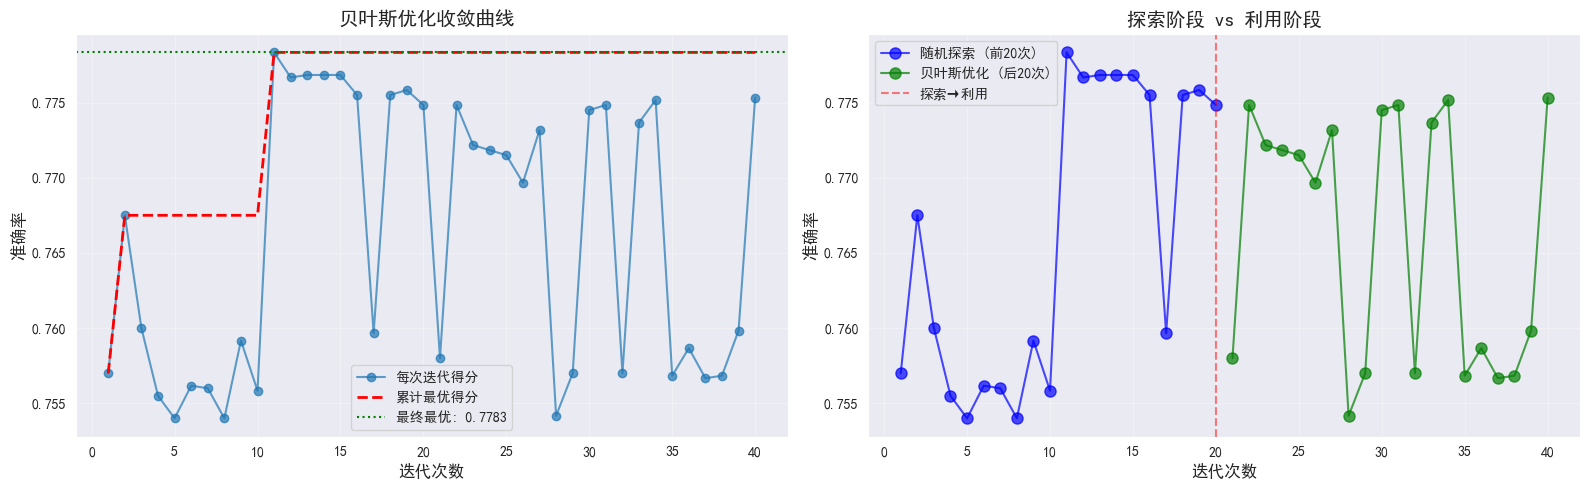

In [109]:
# 提取所有迭代的结果
iterations = []
scores = []
for i, res in enumerate(optimizer.res): # res包含每次迭代的结果，index从0开始
    iterations.append(i + 1) # 迭代次数从1开始
    scores.append(res['target']) # 提取得分

# 计算累计最优值
best_scores = []
current_best = -np.inf # 初始化为负无穷大
for score in scores: 
    if score > current_best: # 检查当前得分是否打破历史记录
        current_best = score
    best_scores.append(current_best)

# 绘制优化轨迹
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5)) # 创建1行2列的子图

# 左图：每次迭代的得分
ax1.plot(iterations, scores, 'o-', label='每次迭代得分', alpha=0.7, markersize=6)
ax1.plot(iterations, best_scores, 'r--', label='累计最优得分', linewidth=2)
ax1.axhline(y=optimizer.max['target'], color='green', linestyle=':', 
            label=f'最终最优: {optimizer.max["target"]:.4f}') # axhline绘制水平线
ax1.set_xlabel('迭代次数', fontsize=12)
ax1.set_ylabel('准确率', fontsize=12)
ax1.set_title('贝叶斯优化收敛曲线 ', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 右图：初始探索 vs 贝叶斯优化
init_points = 20  # 更新为20
ax2.plot(iterations[:init_points], scores[:init_points], 'bo-', 
         label=f'随机探索 (前{init_points}次)', markersize=8, alpha=0.7)
ax2.plot(iterations[init_points:], scores[init_points:], 'go-', 
         label=f'贝叶斯优化 (后{len(iterations)-init_points}次)', markersize=8, alpha=0.7)
ax2.axvline(x=init_points, color='red', linestyle='--', alpha=0.5, label='探索→利用') # axvline绘制垂直线
ax2.set_xlabel('迭代次数', fontsize=12)
ax2.set_ylabel('准确率', fontsize=12)
ax2.set_title('探索阶段 vs 利用阶段', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [110]:
# 输出统计信息
print(f"  总迭代次数: {len(scores)}")
print(f"  最低得分: {min(scores):.4f}")
print(f"  最高得分: {max(scores):.4f}")
print(f"  平均得分: {np.mean(scores):.4f}")
print(f"  得分标准差: {np.std(scores):.4f}")
print(f"  得分提升: {max(scores) - scores[0]:.4f}")

  总迭代次数: 40
  最低得分: 0.7540
  最高得分: 0.7783
  平均得分: 0.7661
  得分标准差: 0.0090
  得分提升: 0.0213
